# Visualize your Data with Multidimensional Scaling

In this notebook, we will introduce a multidimensional scaling method to visualize your high-dimension data at a 2-D plane.

The main idea is mapping the distances of high dimensional space to the distances of 2-D space. Drawing data points at 2-D plane according to the principle that the 2-D distances among points are consistent with their high-dimension distances as much as possible.

In [1]:
import numpy as np

## 1. Define the distance in high dimensional space

You can use any index to describe the distance of the data point in high dimensional space, such as Pearson、Euclidean、cosine distance. We take Euclidean distance as an example.

In [2]:
def euclidean(x0, x1):
    x0, x1 = np.array(x0), np.array(x1)
    d = np.sum((x0 - x1)**2)**0.5
    return d

## 2. Sample Data

Create a set of sample data.

In [3]:
X = 100*np.random.random((100, 10))
label = np.sum(X, axis=1)

print X.shape, label.shape

(100, 10) (100,)


## 4. Scale down

Now, we start to write the function of scale down.

In [4]:
def scaledown(X, distance=euclidean, rate=0.1, itera=1000, rand_time=10, verbose=1):
    
    n = len(X)
    
    # calculate distances martix in high dimensional space
    realdist = np.array([[distance(X[i], X[j]) for j in range(n)] for i in range(n)])
    realdist = realdist / np.max(realdist)  # rescale between 0-1
    
    minerror = None
    for i in range(rand_time): # search for n times
        
        if verbose: print("%s/%s, min_error=%s"%(i, rand_time, minerror))
        
        # initilalize location in 2-D plane randomly
        loc = np.array([[np.random.random(), np.random.random()] for i in range(n)])

        # start iterating
        lasterror = None
        for m in range(itera):

            # calculate distance in 2D plane
            fakedist = np.array([[np.sum((loc[i] - loc[j])**2)**0.5 for j in range(n)] for i in range(n)])

            # calculate move step
            movestep = np.zeros_like(loc)
            total_error = 0
            for i in range(n):
                for j in range(n):                
                    if realdist[i, j] <= 0.01: continue               
                    error_rate = (fakedist[i, j] - realdist[i, j]) / fakedist[i, j]                
                    movestep[i, 0] += ((loc[i, 0] - loc[j, 0]) / fakedist[i, j])*error_rate
                    movestep[i, 1] += ((loc[i, 1] - loc[j, 1]) / fakedist[i, j])*error_rate
                    total_error += abs(error_rate)

            if lasterror and total_error > lasterror: break  # stop iterating if error becomes worse
            lasterror = total_error

            # update location
            loc -= rate*movestep

        # save best location
        if minerror is None or lasterror < minerror:
            minerror = lasterror
            best_loc = loc
        
    return best_loc

In [5]:
loc = scaledown(X, itera=1000, rand_time=10, verbose=1)
print loc

0/10, min_error=None
1/10, min_error=7649.78682844
2/10, min_error=7482.73900556
3/10, min_error=7482.73900556
4/10, min_error=7421.97924064
5/10, min_error=7421.97924064
6/10, min_error=7421.97924064
7/10, min_error=7421.97924064
8/10, min_error=7421.97924064
9/10, min_error=7421.97924064
[[  2.17804775e+00   1.69389490e+00]
 [  1.43444641e+00   2.36329526e+00]
 [  3.00046725e+00  -2.04849606e+00]
 [ -1.39280399e+00   2.32967070e+00]
 [  6.53469927e-01   3.74689111e+00]
 [  5.45584327e-02   1.78589135e+00]
 [ -5.47744374e-01  -2.32317002e+00]
 [  3.88781193e+00  -1.96729861e-02]
 [ -2.94823832e+00   1.08367305e+00]
 [  3.09585635e+00   5.92165337e-01]
 [  4.17811454e-01  -3.42035203e-01]
 [ -2.25045285e+00  -6.50267501e-01]
 [ -3.70000014e-01  -2.99662701e+00]
 [ -7.41818561e-01   3.44740444e+00]
 [ -2.20981859e+00   1.38248734e+00]
 [ -9.85437906e-01   3.78549453e+00]
 [  3.83419097e+00  -1.45405834e-01]
 [  3.61624046e+00   1.53101096e-01]
 [ -5.89949754e-01  -1.50212663e-01]
 [  3.

## 4. Draw in 2-D plane

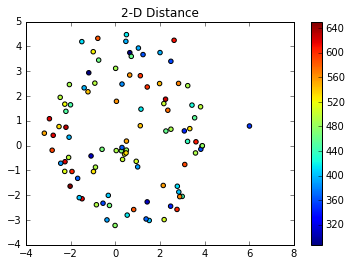

In [6]:
from matplotlib import pyplot as plt

x = loc[:,0]
y = loc[:,1]
c = label

fig = plt.figure()
ax = fig.add_subplot(111)
sc = ax.scatter(x, y, c=c, marker='o')
ax.set_title('2-D Distance')
fig.colorbar(sc)
plt.show()

## Reference

[1] Toby Segaran, Programming Collective Intelgience